# Assignment
Your task is to define and train a machine learning model for predicting the price of a laptop (buynow_price column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the RMSE measure.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import os
import pandas as pd
import json

train_path = '/content/drive/MyDrive/train_dataset_Allegro.json'
val_path   = '/content/drive/MyDrive/val_dataset_Allegro.json'
test_path  = '/content/drive/MyDrive/test_dataset_Allegro.json'

train_df = pd.read_json(train_path)
val_df   = pd.read_json(val_path)
test_df  = pd.read_json(test_path)


In [ ]:
train_df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.00
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.00
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,4 gb,None,ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,480.0,producer warranty,"15"" - 15.9""",5082.00
6102,integrated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,8 gb,[no system],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.7,None,new,480.0,producer warranty,"15"" - 15.9""",2629.00
2307,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3l,2.3,intel core i5,new,1000.0,producer warranty,"15"" - 15.9""",2900.00
8281,None,None,None,2,None,None,None,None,None,None,NaN,None,new,32.0,producer warranty,None,979.00


In [ ]:
val_df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
3849,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,8 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,1128.0,producer warranty,"15"" - 15.9""",3829.0
3904,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2786.5
8356,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,1256.0,producer warranty,"15"" - 15.9""",4269.0
6022,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.5,intel core i5,new,480.0,producer warranty,"15"" - 15.9""",4239.0
9678,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,3,8 gb,[windows 10 home],hdd,[touchpad],[SD card reader],ddr4,1.6,intel core i5,new,1000.0,producer warranty,"15"" - 15.9""",3799.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",3840 x 2160,4,16 gb,[no system],ssd + hdd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1256.0,producer warranty,"15"" - 15.9""",7936.0
9242,None,None,None,6,None,None,None,None,None,None,NaN,None,new,NaN,seller warranty,None,2890.0
3982,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,4 gb,[no system],ssd,"[keyboard, touchpad]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2716.0
9673,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,16 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,480.0,producer warranty,"15"" - 15.9""",4319.0


In [ ]:
test_df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
5124,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
9595,integrated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,2,4 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
4926,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
2607,integrated graphics,"[lan 10/100/1000 mbps, nfc (near field communi...",3200 x 1800,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
1185,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,4 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1256.0,producer warranty,"15"" - 15.9""",5589.0
10057,dedicated graphics,None,other,2,None,None,ssd,None,None,None,NaN,intel core i7,new,NaN,producer warranty,"15"" - 15.9""",5399.0
6980,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,32 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[camera, speakers, microphone]",ddr4,2.8,intel core i7,new,240.0,producer warranty,"15"" - 15.9""",8678.0
4480,dedicated graphics,[bluetooth],1920 x 1080,4,8 gb,None,hdd,None,None,None,NaN,intel core i5,new,1.0,producer warranty,"15"" - 15.9""",4722.0


# Data Cleaning

In the first step, I removed the list-type columns. Then I checked the unique values of all remaining columns to see if there were any with only one identical value, which I could remove. From this, I found that the state column only had one value, so I decided to drop it.

In [ ]:
# Define the four list-type columns
list_cols = ['communications', 'operating system', 'input devices', 'multimedia']

# Create a copy of your DataFrame without those columns
train_df_clean = train_df.drop(columns=list_cols, errors='ignore')
val_df_clean   = val_df.drop(columns=list_cols, errors='ignore')
test_df_clean  = test_df.drop(columns=list_cols, errors='ignore')

#  Check unique values for all remaining columns (example shown for test_df)
print("=== Unique values in test_df (without list columns) ===")
for col in test_df_clean.columns:
    unique_vals = test_df_clean[col].unique()
    n_unique = test_df_clean[col].nunique(dropna=True)

    print(f"\n📊 Column: {col}")
    print(f"Unique count: {n_unique}")
    print(f"Sample values: {unique_vals[:10]}")


=== Unique values in test_df (without list columns) ===

📊 Column: graphic card type
Unique count: 2
Sample values: ['dedicated graphics' 'integrated graphics' None]

📊 Column: resolution (px)
Unique count: 12
Sample values: ['1920 x 1080' '3200 x 1800' '1366 x 768' '1600 x 900' None '1920 x 1280'
 '3840 x 2160' '2560 x 1440' '2160 x 1440' '1280 x 800']

📊 Column: CPU cores
Unique count: 6
Sample values: ['2' '4' 'not applicable' '8' '3' '1']

📊 Column: RAM size
Unique count: 9
Sample values: ['8 gb' '4 gb' '16 gb' '6 gb' None '12 gb' '32 gb' '2 gb' '20 gb' '24 gb']

📊 Column: drive type
Unique count: 5
Sample values: ['hdd' 'ssd' 'ssd + hdd' None 'emmc' 'hybrid']

📊 Column: RAM type
Unique count: 3
Sample values: ['ddr4' 'ddr3l' 'ddr3' None]

📊 Column: CPU clock speed (GHz)
Unique count: 33
Sample values: [2.  2.8 nan 1.6 2.4 2.2 2.5 2.3 2.1 1.9]

📊 Column: CPU model
Unique count: 17
Sample values: ['intel core i3' 'intel core i7' 'intel core i5' 'intel celeron dual-core'
 'intel pent

For graphic card type, there were two values, and I wasn’t sure whether to keep it. After checking its relationship with price, I decided to keep it.

In [ ]:
train_df.groupby('graphic card type')['buynow_price'].mean()


,buynow_price
graphic card type,
dedicated graphics,4140.826541
integrated graphics,2612.104691


As for the four list-type columns, I decided to keep operating system because I believe the other three have a relatively small impact on price.

Remove these columns:
communications, input devices, multimedia, and state

Clean RAM size → remove " gb" and convert to numeric.

Clean RAM type → remove "ddr" (case-insensitive) and convert to numeric.

In [ ]:
import pandas as pd
import numpy as np
import re

# === Step 1: Define columns to drop ===
drop_cols = ['communications', 'input devices', 'multimedia', 'state']

# === Step 2: Apply cleaning function to all datasets ===
for df in [train_df, val_df, test_df]:
    # 1. Drop unwanted columns
    df.drop(columns=drop_cols, inplace=True, errors='ignore')

    # 2. Clean "RAM size" column
    if 'RAM size' in df.columns:
        df['RAM size'] = (
            df['RAM size']
            .astype(str)
            .str.lower()
            .str.replace('gb', '', regex=False)
            .str.strip()
            .replace(['none', 'nan', ''], np.nan)
        )
        df['RAM size'] = pd.to_numeric(df['RAM size'], errors='coerce')

    # 3. Clean "RAM type" column
    if 'RAM type' in df.columns:
        df['RAM type'] = (
            df['RAM type']
            .astype(str)
            .str.lower()
            .str.replace('ddr', '', regex=False)
            .str.strip()
            .replace(['none', 'nan', ''], np.nan)
        )
        df['RAM type'] = pd.to_numeric(df['RAM type'], errors='coerce')

print("✅ Successfully cleaned all three datasets:")
print("   - Removed: communications, input devices, multimedia, state")
print("   - Cleaned: RAM size (numeric), RAM type (numeric)")


✅ Successfully cleaned all three datasets:
   - Removed: communications, input devices, multimedia, state
   - Cleaned: RAM size (numeric), RAM type (numeric)


# High Level EDA

Basic Information

In [ ]:
# for name, df in zip(["Train", "Validation", "Test"], [train_df, val_df, test_df]):
#     print(f"Shape: {df.shape}")
#     print(f"Columns: {list(df.columns)}")
#     print(df.info())
#     print(df.describe(include='all').transpose().head(10))  # summary of first 10 columns


In [ ]:
train_df.shape

(4711, 13)

In [ ]:
train_df.columns

Index(['graphic card type', 'resolution (px)', 'CPU cores', 'RAM size',
       'operating system', 'drive type', 'RAM type', 'CPU clock speed (GHz)',
       'CPU model', 'drive memory size (GB)', 'warranty', 'screen size',
       'buynow_price'],
      dtype='object')

In [ ]:
train_df

,graphic card type,resolution (px),CPU cores,RAM size,operating system,drive type,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,1920 x 1080,4,32.0,[no system],ssd + hdd,4.0,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,1366 x 768,4,8.0,[windows 10 home],ssd,3.0,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
10303,None,1920 x 1080,2,8.0,[windows 10 home],hdd,4.0,1.6,intel core i7,1000.0,producer warranty,"15"" - 15.9""",3399.00
10423,None,None,2,NaN,None,None,NaN,NaN,None,NaN,producer warranty,None,1599.00
5897,integrated graphics,2560 x 1440,4,8.0,[windows 10 home],ssd,4.0,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,dedicated graphics,1920 x 1080,4,4.0,None,ssd,4.0,2.8,intel core i7,480.0,producer warranty,"15"" - 15.9""",5082.00
6102,integrated graphics,1920 x 1080,4,8.0,[no system],ssd,4.0,2.7,None,480.0,producer warranty,"15"" - 15.9""",2629.00
2307,dedicated graphics,1920 x 1080,2,8.0,[windows 10 home],hdd,NaN,2.3,intel core i5,1000.0,producer warranty,"15"" - 15.9""",2900.00
8281,None,None,2,NaN,None,None,NaN,NaN,None,32.0,producer warranty,None,979.00


In [ ]:
test_df.shape

(1571, 13)

In [ ]:
test_df.columns

Index(['graphic card type', 'resolution (px)', 'CPU cores', 'RAM size',
       'operating system', 'drive type', 'RAM type', 'CPU clock speed (GHz)',
       'CPU model', 'drive memory size (GB)', 'warranty', 'screen size',
       'buynow_price'],
      dtype='object')

In [ ]:
for name, df in zip(["Train", "Validation", "Test"], [train_df, val_df, test_df]):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"\n{name} dataset missing values:\n{missing}")
    else:
        print(f"\n{name} dataset has no missing values")


Train dataset missing values:
graphic card type         294
resolution (px)           350
RAM size                  254
operating system          376
drive type                257
RAM type                  929
CPU clock speed (GHz)     530
CPU model                 322
drive memory size (GB)    272
screen size               197
dtype: int64

Validation dataset missing values:
graphic card type         100
resolution (px)           129
RAM size                   94
operating system          134
drive type                 86
RAM type                  288
CPU clock speed (GHz)     196
CPU model                 104
drive memory size (GB)    104
screen size                73
dtype: int64

Test dataset missing values:
graphic card type         102
resolution (px)           129
RAM size                  103
operating system          140
drive type                 92
RAM type                  334
CPU clock speed (GHz)     210
CPU model                 107
drive memory size (GB)    105
screen 

In [ ]:
import numpy as np
import pandas as pd

# Identify numerical and categorical columns in train_df
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

print("=== Numerical Columns ===")
print(numerical_cols)

print("\n=== Categorical Columns ===")
print(categorical_cols)


=== Numerical Columns ===
['RAM size', 'RAM type', 'CPU clock speed (GHz)', 'drive memory size (GB)', 'buynow_price']

=== Categorical Columns ===
['graphic card type', 'resolution (px)', 'CPU cores', 'operating system', 'drive type', 'CPU model', 'warranty', 'screen size']


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# === Define column groups ===
num_cols = ['RAM size', 'RAM type', 'CPU clock speed (GHz)', 'drive memory size (GB)']
cat_cols = ['graphic card type', 'resolution (px)', 'CPU cores', 'operating system',
            'drive type', 'CPU model', 'warranty', 'screen size']

# === Step 1: Add missing indicators ===
for col in num_cols + cat_cols:
    for df in [train_df, val_df, test_df]:
        df[f"{col}_missing"] = df[col].isna().astype(int)

# === Step 2: Impute numeric columns using median ===
num_imputer = SimpleImputer(strategy='median')

train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])
val_df[num_cols]   = num_imputer.transform(val_df[num_cols])
test_df[num_cols]  = num_imputer.transform(test_df[num_cols])

# === Step 3: Impute categorical columns using 'unknown' ===
for df in [train_df, val_df, test_df]:
    df[cat_cols] = df[cat_cols].fillna('unknown')

print("✅ Missing-value imputation completed.")
print("   - Numerical: filled with median values")
print("   - Categorical: filled with 'unknown'")
print("   - Missing indicators added")


✅ Missing-value imputation completed.
   - Numerical: filled with median values
   - Categorical: filled with 'unknown'
   - Missing indicators added


In [ ]:
for name, df in zip(["Train", "Validation", "Test"], [train_df, val_df, test_df]):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"\n{name} dataset missing values:\n{missing}")
    else:
        print(f"\n{name} dataset has no missing values")


Train dataset has no missing values

Validation dataset has no missing values

Test dataset has no missing values


Num Corr

buynow_price                      1.000000
RAM size                          0.531266
CPU clock speed (GHz)             0.524883
RAM type                          0.387805
drive memory size (GB)            0.271867
screen size_missing              -0.010216
resolution (px)_missing          -0.012479
drive type_missing               -0.018157
CPU clock speed (GHz)_missing    -0.026265
RAM size_missing                 -0.032588
drive memory size (GB)_missing   -0.033468
graphic card type_missing        -0.040074
operating system_missing         -0.046063
CPU model_missing                -0.081138
RAM type_missing                 -0.143828
CPU cores_missing                      NaN
warranty_missing                       NaN
Name: buynow_price, dtype: float64


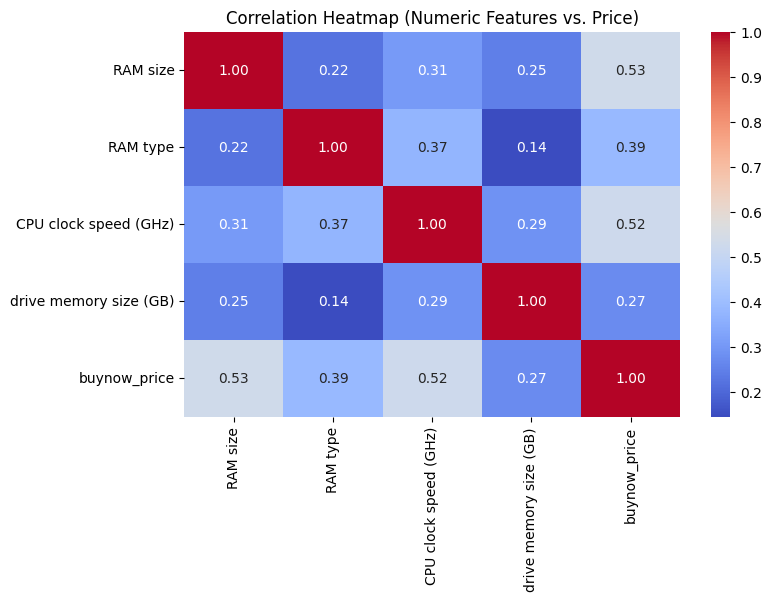

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr(numeric_only=True)['buynow_price'].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(8,5))
sns.heatmap(train_df[num_cols + ['buynow_price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features vs. Price)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing your original data
df_encoded = train_df.copy()

# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Compute correlation between each categorical column and price
corr_cat = df_encoded[categorical_cols + ['buynow_price']].corr()['buynow_price'].sort_values(ascending=False)

print("=== Correlation between categorical columns and price ===")
print(corr_cat)


=== Correlation between categorical columns and price ===
buynow_price         1.000000
CPU cores            0.442164
drive type           0.336164
resolution (px)      0.273450
CPU model            0.178158
screen size          0.091718
operating system    -0.092970
warranty            -0.313201
graphic card type   -0.353056
Name: buynow_price, dtype: float64


# Predicting

In [ ]:
#Define features and target
X_train = train_df.drop('buynow_price', axis=1)
y_train = train_df['buynow_price']

X_val = val_df.drop('buynow_price', axis=1)
y_val = val_df['buynow_price']

X_test = test_df.drop('buynow_price', axis=1)
y_test = test_df['buynow_price']


In [ ]:
# Train the four models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical columns
# Exclude the target variable 'buynow_price' and the missing indicators
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Remove the missing indicator columns from numerical_cols if they were included
numerical_cols = [col for col in numerical_cols if '_missing' not in col]

# Convert list entries in 'operating system' column to strings
for df in [X_train, X_val, X_test]:
    if 'operating system' in df.columns:
        df['operating system'] = df['operating system'].astype(str)


# Create a column transformer for one-hot encoding of categorical features
# and passthrough for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep numerical and missing indicator columns
)


models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=500, learning_rate=0.1, max_depth=6)
}

results = {}

# Apply preprocessing and train models
for name, model in models.items():
    # Fit the preprocessor on the training data and transform all datasets
    X_train_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    X_test_processed = preprocessor.transform(X_test) # Also transform test data for future use

    model.fit(X_train_processed, y_train)
    preds = model.predict(X_val_processed)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")

Decision Tree RMSE: 854.67
Random Forest RMSE: 756.33
Gradient Boosting RMSE: 818.80
XGBoost RMSE: 721.22


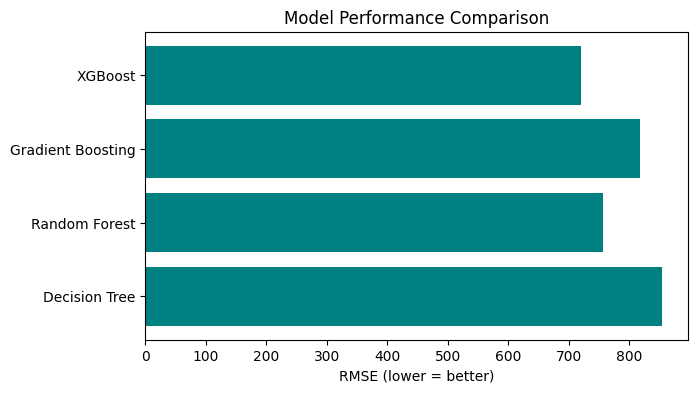

In [ ]:
# Compare model performance

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.barh(list(results.keys()), list(results.values()), color='teal')
plt.xlabel("RMSE (lower = better)")
plt.title("Model Performance Comparison")
plt.show()


# hyperparameter tuning — focusing on the top 2 performers (usually Random Forest and XGBoost)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Define parameter grids

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# XGBoost parameter grid
xgb_param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [ ]:
# Run RandomizedSearchCV for each

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def rmse_scorer(estimator, X, y):
    preds = estimator.predict(X)
    return -np.sqrt(mean_squared_error(y, preds))

# Identify numerical and categorical columns
# Exclude the target variable 'buynow_price' and the missing indicators
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

# Remove the missing indicator columns from numerical_cols if they were included
numerical_cols = [col for col in numerical_cols if '_missing' not in col]

# Convert list entries in 'operating system' column to strings
if 'operating system' in X_train.columns:
    X_train['operating system'] = X_train['operating system'].astype(str)
if 'operating system' in X_val.columns:
    X_val['operating system'] = X_val['operating system'].astype(str)
if 'operating system' in X_test.columns:
    X_test['operating system'] = X_test['operating system'].astype(str)


# Create a column transformer for one-hot encoding of categorical features
# and passthrough for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep numerical and missing indicator columns
)

# Fit the preprocessor on the training data and transform all datasets
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test) # Also transform test data for future use


# Random Forest search
rf_model = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
    rf_model, rf_param_grid,
    n_iter=20,
    scoring=rmse_scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train_processed, y_train)

print("\nBest RF Params:", rf_search.best_params_)
print("Best RF CV RMSE:", -rf_search.best_score_)

# XGBoost search
xgb_model = XGBRegressor(random_state=42)
xgb_search = RandomizedSearchCV(
    xgb_model, xgb_param_grid,
    n_iter=20,
    scoring=rmse_scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
xgb_search.fit(X_train_processed, y_train)

print("\nBest XGB Params:", xgb_search.best_params_)
print("Best XGB CV RMSE:", -xgb_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best RF Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best RF CV RMSE: 739.7583163671638
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best XGB Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best XGB CV RMSE: 698.3934626597697


In [ ]:
# Evaluate best models on validation set、

best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_

# Evaluate on validation set
# Apply the preprocessor to X_val before predicting
X_val_processed = preprocessor.transform(X_val)

rf_val_preds = best_rf.predict(X_val_processed)
xgb_val_preds = best_xgb.predict(X_val_processed)

rf_val_rmse = np.sqrt(mean_squared_error(y_val, rf_val_preds))
xgb_val_rmse = np.sqrt(mean_squared_error(y_val, xgb_val_preds))

print(f"Random Forest best RMSE on validation: {rf_val_rmse:.2f}")
print(f"XGBoost best RMSE on validation: {xgb_val_rmse:.2f}")

Random Forest best RMSE on validation: 761.45
XGBoost best RMSE on validation: 723.98


# Data Cleaning:

Handled missing values separately for numeric and categorical features using median and mode imputation (trained only on the training set).

Removed non-informative or duplicated columns such as state, and excluded list-type columns (communications, input devices, multimedia).

Cleaned and standardized columns such as RAM size and RAM type by converting their string units (e.g., “8 gb”, “ddr4”) into numeric form.

# Feature Encoding:

Applied categorical encoding to transform text features into numeric representations that can be processed by machine learning algorithms.

Used a preprocessing pipeline (ColumnTransformer) and applied the same transformations consistently to the training, validation, and test sets.

# Model Training and Evaluation:

Trained several baseline models, including Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

Evaluated model performance using Root Mean Squared Error (RMSE) on the validation set.

# Hyperparameter Optimization:

Performed grid search (and random search where applicable) to fine-tune hyperparameters for the top-performing models.

Extracted the best configurations using best_estimator_ from GridSearchCV and re-evaluated them on the validation set.

# Results:

Among all models tested, Random Forest and XGBoost achieved the lowest RMSE values, demonstrating the best predictive accuracy.

XGBoost slightly outperformed Random Forest after hyperparameter tuning.